# 10 minutes to pandas

#### Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd

# Basic data structures in pandas

#### Pandas provides two types of classes for handling data:

#### Series: a one-dimensional labeled array holding data of any type such as integers, strings, Python objects etc.

#### DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

# Object creation

#### Creating a Series by passing a list of values, letting pandas create a default RangeIndex

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

#### Creating a DataFrame by passing a NumPy array with a datetime index using date_range() and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-2.676098,-0.288082,1.572647,1.019299
2013-01-02,1.428894,-0.825014,0.847679,0.689150
2013-01-03,0.669800,-0.274790,1.006162,-1.144133
2013-01-04,1.327075,-1.109091,-0.569616,0.505253
2013-01-05,0.719515,0.752348,-0.881247,-0.150154
2013-01-06,0.468485,0.003140,-0.211682,2.918998


#### Creating a DataFrame by passing a dictionary of objects where the keys are the column labels and the values are the column values.

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


#### The columns of the resulting DataFrame have different dtypes:

In [6]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

# Viewing data

#### Use DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively:

In [7]:
df.head()

,A,B,C,D
2013-01-01,-2.676098,-0.288082,1.572647,1.019299
2013-01-02,1.428894,-0.825014,0.847679,0.689150
2013-01-03,0.669800,-0.274790,1.006162,-1.144133
2013-01-04,1.327075,-1.109091,-0.569616,0.505253
2013-01-05,0.719515,0.752348,-0.881247,-0.150154


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,1.327075,-1.109091,-0.569616,0.505253
2013-01-05,0.719515,0.752348,-0.881247,-0.150154
2013-01-06,0.468485,0.003140,-0.211682,2.918998


#### Display the DataFrame.index or DataFrame.columns:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

#### Return a NumPy representation of the underlying data with DataFrame.to_numpy() without the index or column labels:

In [11]:
df.to_numpy()

array([[-2.67609848, -0.28808205,  1.57264673,  1.01929856],
       [ 1.42889352, -0.8250139 ,  0.84767911,  0.68915023],
       [ 0.66980019, -0.27478959,  1.0061622 , -1.14413276],
       [ 1.32707518, -1.10909093, -0.56961629,  0.5052528 ],
       [ 0.71951488,  0.75234847, -0.88124702, -0.15015427],
       [ 0.46848468,  0.0031403 , -0.21168206,  2.91899778]])

#### NumPy arrays have one dtype for the entire array while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. If the common data type is object, DataFrame.to_numpy() will require copying data.

In [12]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

#### describe() shows a quick statistic summary of your data:

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.322945,-0.290248,0.293990,0.639735
std,1.518184,0.652657,0.982998,1.353938
min,-2.676098,-1.109091,-0.881247,-1.144133
25%,0.518814,-0.690781,-0.480133,0.013698
50%,0.694658,-0.281436,0.317999,0.597202
75%,1.175185,-0.066342,0.966541,0.936761
max,1.428894,0.752348,1.572647,2.918998


#### Transposing your data:

In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-2.676098,1.428894,0.669800,1.327075,0.719515,0.468485
B,-0.288082,-0.825014,-0.274790,-1.109091,0.752348,0.003140
C,1.572647,0.847679,1.006162,-0.569616,-0.881247,-0.211682
D,1.019299,0.689150,-1.144133,0.505253,-0.150154,2.918998


#### DataFrame.sort_index() sorts by an axis:

In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.019299,1.572647,-0.288082,-2.676098
2013-01-02,0.689150,0.847679,-0.825014,1.428894
2013-01-03,-1.144133,1.006162,-0.274790,0.669800
2013-01-04,0.505253,-0.569616,-1.109091,1.327075
2013-01-05,-0.150154,-0.881247,0.752348,0.719515
2013-01-06,2.918998,-0.211682,0.003140,0.468485


#### DataFrame.sort_values() sorts by values:

In [17]:
df.sort_values(by="B")

,A,B,C,D
2013-01-04,1.327075,-1.109091,-0.569616,0.505253
2013-01-02,1.428894,-0.825014,0.847679,0.689150
2013-01-01,-2.676098,-0.288082,1.572647,1.019299
2013-01-03,0.669800,-0.274790,1.006162,-1.144133
2013-01-06,0.468485,0.003140,-0.211682,2.918998
2013-01-05,0.719515,0.752348,-0.881247,-0.150154


# Selection

#### While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc()

## Getitem ([])

#### For a DataFrame, passing a single label selects a columns and yields a Series equivalent to df.A:

In [18]:
df["A"]

2013-01-01   -2.676098
2013-01-02    1.428894
2013-01-03    0.669800
2013-01-04    1.327075
2013-01-05    0.719515
2013-01-06    0.468485
Freq: D, Name: A, dtype: float64

#### For a DataFrame, passing a slice : selects matching rows:

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,-2.676098,-0.288082,1.572647,1.019299
2013-01-02,1.428894,-0.825014,0.847679,0.689150
2013-01-03,0.669800,-0.274790,1.006162,-1.144133


In [20]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,1.428894,-0.825014,0.847679,0.689150
2013-01-03,0.669800,-0.274790,1.006162,-1.144133
2013-01-04,1.327075,-1.109091,-0.569616,0.505253


## Selection by label

#### Selecting a row matching a label:

In [21]:
df.loc[dates[0]]

A   -2.676098
B   -0.288082
C    1.572647
D    1.019299
Name: 2013-01-01 00:00:00, dtype: float64

#### Selecting all rows (:) with a select column labels:

In [22]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-2.676098,-0.288082
2013-01-02,1.428894,-0.825014
2013-01-03,0.669800,-0.274790
2013-01-04,1.327075,-1.109091
2013-01-05,0.719515,0.752348
2013-01-06,0.468485,0.003140


#### For label slicing, both endpoints are included:

In [23]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.428894,-0.825014
2013-01-03,0.669800,-0.274790
2013-01-04,1.327075,-1.109091


#### Selecting a single row and column label returns a scalar:

In [24]:
df.loc[dates[0], "A"]

-2.6760984754375507

#### For getting fast access to a scalar (equivalent to the prior method):

In [25]:
df.at[dates[0], "A"]

-2.6760984754375507

## Selection by position

#### Select via the position of the passed integers:

In [26]:
df.iloc[3]

A    1.327075
B   -1.109091
C   -0.569616
D    0.505253
Name: 2013-01-04 00:00:00, dtype: float64

#### Integer slices acts similar to NumPy/Python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.327075,-1.109091
2013-01-05,0.719515,0.752348


#### Lists of integer position locations:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.428894,0.847679
2013-01-03,0.669800,1.006162
2013-01-05,0.719515,-0.881247


#### For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.428894,-0.825014,0.847679,0.689150
2013-01-03,0.669800,-0.274790,1.006162,-1.144133


#### For slicing columns explicitly:

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.288082,1.572647
2013-01-02,-0.825014,0.847679
2013-01-03,-0.274790,1.006162
2013-01-04,-1.109091,-0.569616
2013-01-05,0.752348,-0.881247
2013-01-06,0.003140,-0.211682


#### For getting a value explicitly:

In [31]:
df.iloc[1, 1]

-0.8250138989459678

#### For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.iat[1, 1]

-0.8250138989459678

## Boolean indexing

#### Select rows where df.A is greater than 0.

In [33]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,1.428894,-0.825014,0.847679,0.689150
2013-01-03,0.669800,-0.274790,1.006162,-1.144133
2013-01-04,1.327075,-1.109091,-0.569616,0.505253
2013-01-05,0.719515,0.752348,-0.881247,-0.150154
2013-01-06,0.468485,0.003140,-0.211682,2.918998


#### Selecting values from a DataFrame where a boolean condition is met:

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,1.572647,1.019299
2013-01-02,1.428894,NaN,0.847679,0.689150
2013-01-03,0.669800,NaN,1.006162,NaN
2013-01-04,1.327075,NaN,NaN,0.505253
2013-01-05,0.719515,0.752348,NaN,NaN
2013-01-06,0.468485,0.003140,NaN,2.918998


#### Using isin() method for filtering:

In [35]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-2.676098,-0.288082,1.572647,1.019299,one
2013-01-02,1.428894,-0.825014,0.847679,0.689150,one
2013-01-03,0.669800,-0.274790,1.006162,-1.144133,two
2013-01-04,1.327075,-1.109091,-0.569616,0.505253,three
2013-01-05,0.719515,0.752348,-0.881247,-0.150154,four
2013-01-06,0.468485,0.003140,-0.211682,2.918998,three


In [36]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.669800,-0.274790,1.006162,-1.144133,two
2013-01-05,0.719515,0.752348,-0.881247,-0.150154,four


## Setting

#### Setting a new column automatically aligns the data by the indexes:

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1

#### Setting values by label:

In [39]:
df.at[dates[0], "A"] = 0

#### Setting values by position:

In [40]:
df.iat[0, 1] = 0

#### Setting by assigning with a NumPy array:

In [41]:
df.loc[:, "D"] = np.array([5] * len(df))

#### The result of the prior setting operations:

In [42]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.572647,5.0,NaN
2013-01-02,1.428894,-0.825014,0.847679,5.0,1.0
2013-01-03,0.669800,-0.274790,1.006162,5.0,2.0
2013-01-04,1.327075,-1.109091,-0.569616,5.0,3.0
2013-01-05,0.719515,0.752348,-0.881247,5.0,4.0
2013-01-06,0.468485,0.003140,-0.211682,5.0,5.0


#### A where operation with setting:

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.572647,-5.0,NaN
2013-01-02,-1.428894,-0.825014,-0.847679,-5.0,-1.0
2013-01-03,-0.669800,-0.274790,-1.006162,-5.0,-2.0
2013-01-04,-1.327075,-1.109091,-0.569616,-5.0,-3.0
2013-01-05,-0.719515,-0.752348,-0.881247,-5.0,-4.0
2013-01-06,-0.468485,-0.003140,-0.211682,-5.0,-5.0


# Missing data

#### Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.572647,5.0,NaN,1.0
2013-01-02,1.428894,-0.825014,0.847679,5.0,1.0,1.0
2013-01-03,0.669800,-0.274790,1.006162,5.0,2.0,NaN
2013-01-04,1.327075,-1.109091,-0.569616,5.0,3.0,NaN


#### DataFrame.dropna() drops any rows that have missing data:

In [45]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,1.428894,-0.825014,0.847679,5.0,1.0,1.0


#### DataFrame.fillna() fills missing data:

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.572647,5.0,5.0,1.0
2013-01-02,1.428894,-0.825014,0.847679,5.0,1.0,1.0
2013-01-03,0.669800,-0.274790,1.006162,5.0,2.0,5.0
2013-01-04,1.327075,-1.109091,-0.569616,5.0,3.0,5.0


#### isna() gets the boolean mask where values are nan:

In [47]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

## Stats

#### Operations in general exclude missing data.

#### Calculate the mean value for each column:

In [48]:
df.mean()

A    0.768961
B   -0.242234
C    0.293990
D    5.000000
F    3.000000
dtype: float64

#### Calculate the mean value for each row:

In [49]:
df.mean(axis=1)

2013-01-01    1.643162
2013-01-02    1.490312
2013-01-03    1.680235
2013-01-04    1.529674
2013-01-05    1.918123
2013-01-06    2.051989
Freq: D, dtype: float64

#### Работа с другой серией или DataFrame с другим индексом или столбцом приведет к выравниванию результата с объединением меток индекса или столбца. Кроме того, pandas автоматически транслирует данные по указанному измерению и заполняет невыровненные метки с помощью np.nan.

In [50]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.572647,5.0,NaN
2013-01-02,1.428894,-0.825014,0.847679,5.0,1.0
2013-01-03,0.669800,-0.274790,1.006162,5.0,2.0
2013-01-04,1.327075,-1.109091,-0.569616,5.0,3.0
2013-01-05,0.719515,0.752348,-0.881247,5.0,4.0
2013-01-06,0.468485,0.003140,-0.211682,5.0,5.0


In [52]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.330200,-1.274790,0.006162,4.0,1.0
2013-01-04,-1.672925,-4.109091,-3.569616,2.0,0.0
2013-01-05,-4.280485,-4.247652,-5.881247,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## User defined functions

#### DataFrame.agg() and DataFrame.transform() applies a user defined function that reduces or broadcasts its result respectively.

In [53]:
df.agg(lambda x: np.mean(x) * 5.6)

A     4.306184
B    -1.356512
C     1.646346
D    28.000000
F    16.800000
dtype: float64

In [54]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,159.151849,506.0,NaN
2013-01-02,144.604024,-83.491407,85.785126,506.0,101.2
2013-01-03,67.783779,-27.808706,101.823614,506.0,202.4
2013-01-04,134.300008,-112.240002,-57.645168,506.0,303.6
2013-01-05,72.814906,76.137666,-89.182199,506.0,404.8
2013-01-06,47.410650,0.317799,-21.422224,506.0,506.0


## Value counts

In [55]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    5
2    5
3    2
4    0
5    0
6    6
7    6
8    5
9    0
dtype: int64

In [56]:
s.value_counts()

5    3
0    3
6    2
4    1
2    1
Name: count, dtype: int64

## String methods

#### Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. See more at Vectorized String Methods.

In [57]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

#### pandas provides various facilities for easily combining together Series` and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations. See the Merging section.

#### Concatenating pandas objects together row-wise with concat():

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.308428,0.375563,-0.118428,-1.089821
1,-0.933289,0.261574,0.231799,-1.083166
2,-1.465772,0.482489,-0.104045,-0.163440
3,-0.257274,0.190751,0.457306,-0.661486
4,-0.278076,0.506653,-0.293501,-0.324994
5,-1.314467,2.606302,-0.675680,-2.413944
6,1.360287,1.401438,-0.945636,-0.070811
7,1.068371,-1.685217,-1.068911,-1.064030
8,0.191969,-1.352341,-0.685072,0.781435
9,0.563879,-0.001888,-0.248003,-0.045772


In [59]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.308428,0.375563,-0.118428,-1.089821
1,-0.933289,0.261574,0.231799,-1.083166
2,-1.465772,0.482489,-0.104045,-0.163440
3,-0.257274,0.190751,0.457306,-0.661486
4,-0.278076,0.506653,-0.293501,-0.324994
5,-1.314467,2.606302,-0.675680,-2.413944
6,1.360287,1.401438,-0.945636,-0.070811
7,1.068371,-1.685217,-1.068911,-1.064030
8,0.191969,-1.352341,-0.685072,0.781435
9,0.563879,-0.001888,-0.248003,-0.045772


#### Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.

## Join

#### merge() enables SQL style join types along specific columns. See the Database style joining section.

In [60]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [61]:
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### merge() on unique keys:

In [64]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [65]:
left

,key,lval
0,foo,1
1,bar,2


In [66]:
right

,key,rval
0,foo,4
1,bar,5


In [67]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

#### By “group by” we are referring to a process involving one or more of the following steps:

#### 1. Splitting the data into groups based on some criteria

#### 2. Applying a function to each group independently

#### 3. Combining the results into a data structure

#### See the Grouping section.

In [68]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.289600,-1.716497
1,bar,one,-1.542522,0.260183
2,foo,two,0.380181,0.650192
3,bar,three,-1.228638,0.388001
4,foo,two,0.723156,1.695388
5,bar,two,-0.106186,1.790665
6,foo,one,2.211459,1.080435
7,foo,three,-0.099452,0.261128


#### Grouping by a column label, selecting column labels, and then applying the sum() function to the resulting groups:

In [69]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-2.877346,2.438850
foo,3.504943,1.970646


#### Grouping by multiple columns label forms MultiIndex.

In [70]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.542522  0.260183
    three -1.228638  0.388001
    two   -0.106186  1.790665
foo one    2.501058 -0.636062
    three -0.099452  0.261128
    two    1.103336  2.345580

# Reshaping

## Stack

In [71]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

# df
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.040266 -0.924075
      two     0.960926  1.218891
baz   one     0.629175  0.344143
      two     1.043141 -0.384334

#### The stack() method “compresses” a level in the DataFrame’s columns:

In [72]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A   -1.040266
               B   -0.924075
       two     A    0.960926
               B    1.218891
baz    one     A    0.629175
               B    0.344143
       two     A    1.043141
               B   -0.384334
dtype: float64

#### With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [73]:
stacked.unstack()

A         B
first second                    
bar   one    -1.040266 -0.924075
      two     0.960926  1.218891
baz   one     0.629175  0.344143
      two     1.043141 -0.384334

In [74]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.040266  0.960926
      B -0.924075  1.218891
baz   A  0.629175  1.043141
      B  0.344143 -0.384334

In [75]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.040266  0.629175
       B -0.924075  0.344143
two    A  0.960926  1.043141
       B  1.218891 -0.384334

## Pivot tables

In [76]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,-0.976367,0.123812
1,one,B,foo,-0.321257,-1.892454
2,two,C,foo,-0.217660,-0.070070
3,three,A,bar,1.160864,0.779277
4,one,B,bar,-0.820567,0.612759
5,one,C,bar,0.543568,-0.892624
6,two,A,foo,0.059736,-1.303067
7,three,B,foo,-0.211529,-0.881141
8,one,C,foo,0.028566,-1.423901
9,one,A,bar,-1.345861,0.596796


#### pivot_table() pivots a DataFrame specifying the values, index and columns

In [77]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -1.345861 -0.976367
      B -0.820567 -0.321257
      C  0.543568  0.028566
three A  1.160864       NaN
      B       NaN -0.211529
      C -1.486423       NaN
two   A       NaN  0.059736
      B -0.480358       NaN
      C       NaN -0.217660

# Time series

#### pandas имеет простые, мощные и эффективные функции для выполнения операций передискретизации во время преобразования частоты (например, преобразование секундных данных в 5-минутные данные). Это чрезвычайно распространено в финансовых приложениях, помимо прочего. См. раздел «Временные ряды».

In [78]:
rng = pd.date_range(start="1/1/2012", periods=100, freq="S")

ts = pd.Series(np.random.randint(low=0, high=500, size=len(rng)), index=rng)

ts.resample("5Min").sum()

2012-01-01    23181
Freq: 5T, dtype: int64

#### Series.tz_localize() localizes a time series to a time zone:

In [88]:
rng = pd.date_range(start="3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(data=np.random.randn(len(rng)), index=rng)

ts

2012-03-06    0.316199
2012-03-07    0.366222
2012-03-08   -0.155667
2012-03-09   -1.279479
2012-03-10   -0.587900
Freq: D, dtype: float64

In [89]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00    0.316199
2012-03-07 00:00:00+00:00    0.366222
2012-03-08 00:00:00+00:00   -0.155667
2012-03-09 00:00:00+00:00   -1.279479
2012-03-10 00:00:00+00:00   -0.587900
Freq: D, dtype: float64

#### Series.tz_convert() converts a timezones aware time series to another time zone:

In [90]:
ts_utc.tz_convert("Europe/Paris")

2012-03-06 01:00:00+01:00    0.316199
2012-03-07 01:00:00+01:00    0.366222
2012-03-08 01:00:00+01:00   -0.155667
2012-03-09 01:00:00+01:00   -1.279479
2012-03-10 01:00:00+01:00   -0.587900
Freq: D, dtype: float64

#### Adding a non-fixed duration (BusinessDay) to a time series:

In [91]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [92]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

# Categoricals

#### pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [101]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


#### Converting the raw grades to a categorical data type:

In [102]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

#### Rename the categories to more meaningful names:

In [105]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

#### Измените порядок категорий и одновременно добавьте недостающие категории (методы Series.cat() по умолчанию возвращают новую серию):

In [108]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

#### Sorting is per order in the categories, not lexical order:

In [109]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


#### Grouping by a categorical column with observed=False also shows empty categories:

In [110]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

#### See the Plotting docs.

#### We use the standard convention for referencing the matplotlib API:

In [112]:
import matplotlib.pyplot as plt

plt.close("all")

The plt.close method is used to close a figure window:

<Axes: >

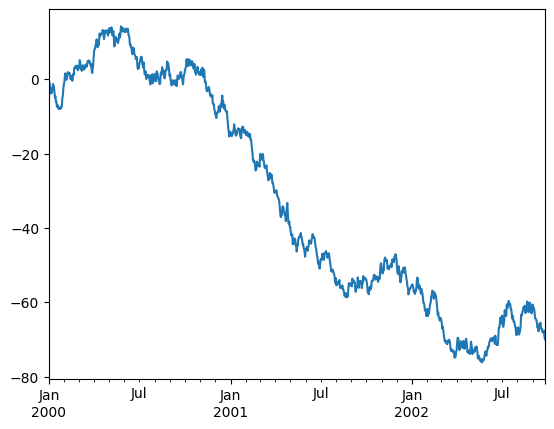

In [115]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

#### When using Jupyter, the plot will appear using plot(). Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.

#### plot() plots all columns:

<Figure size 640x480 with 0 Axes>

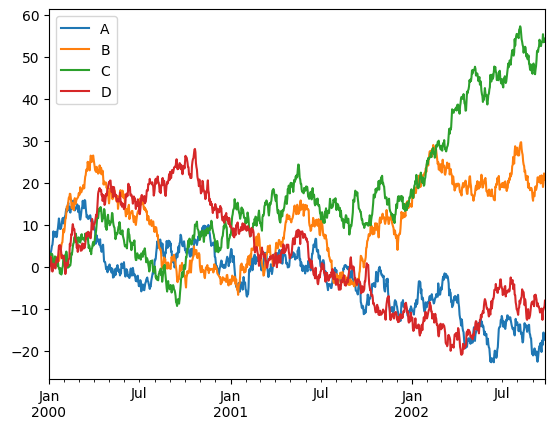

In [116]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

# Importing and exporting data

## CSV

#### Writing to a csv file: using DataFrame.to_csv()

In [118]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")

#### Reading from a csv file: using read_csv()

In [119]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,0,0,3,2,2
1,1,4,3,4,1,1
2,2,3,1,3,3,3
3,3,2,3,3,1,0
4,4,1,1,0,2,0
5,5,1,3,2,3,3
6,6,0,1,0,2,3
7,7,3,2,4,1,2
8,8,4,4,3,3,2
9,9,3,4,2,4,1


## Parquet

#### Writing to a Parquet file:

In [121]:
df.to_parquet("foo.parquet")

#### Reading from a Parquet file Store using read_parquet()

In [122]:
pd.read_parquet("foo.parquet")

,0,1,2,3,4
0,0,0,3,2,2
1,4,3,4,1,1
2,3,1,3,3,3
3,2,3,3,1,0
4,1,1,0,2,0
5,1,3,2,3,3
6,0,1,0,2,3
7,3,2,4,1,2
8,4,4,3,3,2
9,3,4,2,4,1


## Excel

#### Reading and writing to Excel.

#### Writing to an excel file using DataFrame.to_excel():

In [124]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

#### Reading from an excel file using read_excel():

In [125]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,0,0,3,2,2
1,1,4,3,4,1,1
2,2,3,1,3,3,3
3,3,2,3,3,1,0
4,4,1,1,0,2,0
5,5,1,3,2,3,3
6,6,0,1,0,2,3
7,7,3,2,4,1,2
8,8,4,4,3,3,2
9,9,3,4,2,4,1


# Gotchas

#### If you are attempting to perform a boolean operation on a Series or DataFrame you might see an exception like:

In [126]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### See Comparisons and Gotchas for an explanation and what to do.